<a href="https://colab.research.google.com/github/AmitGupta1994/gait-phase-detection-using-joint-angles/blob/main/gait_phase_detection_using_joint_angles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
# Copy Google Driver Folder to Google Colab Folder
!cp -av /content/gdrive/MyDrive/gait-phase-detection-using-joing-angles-dataset/ /content/gaitphase/

'/content/gdrive/MyDrive/gait-phase-detection-using-joing-angles-dataset/' -> '/content/gaitphase/'
'/content/gdrive/MyDrive/gait-phase-detection-using-joing-angles-dataset/gait-phase-detection-using-joint-angles-testing-dataset.xlsx' -> '/content/gaitphase/gait-phase-detection-using-joint-angles-testing-dataset.xlsx'
'/content/gdrive/MyDrive/gait-phase-detection-using-joing-angles-dataset/gait-phase-detection-using-joint-angles-training-dataset.xlsx' -> '/content/gaitphase/gait-phase-detection-using-joint-angles-training-dataset.xlsx'
'/content/gdrive/MyDrive/gait-phase-detection-using-joing-angles-dataset/gait-phase-detection-using-joint-angles-testing-dataset.csv' -> '/content/gaitphase/gait-phase-detection-using-joint-angles-testing-dataset.csv'
'/content/gdrive/MyDrive/gait-phase-detection-using-joing-angles-dataset/gait-phase-detection-using-joint-angles-training-dataset.csv' -> '/content/gaitphase/gait-phase-detection-using-joint-angles-training-dataset.csv'
'/content/gdrive/MyD

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/content/gaitphase/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gaitphase/gait-phase-detection-using-joint-angles-training-dataset.csv
/content/gaitphase/gait-phase-detection-using-joint-angles-training-dataset.xlsx
/content/gaitphase/training1-gait-joint-angles-dataset.csv
/content/gaitphase/training2-gait-joint-angles-dataset.csv
/content/gaitphase/testing2-gait-joint-angles-dataset.csv
/content/gaitphase/gait-phase-detection-using-joint-angles-testing-dataset.csv
/content/gaitphase/gait-phase-detection-using-joint-angles-testing-dataset.xlsx
/content/gaitphase/testing1-gait-joint-angles-dataset.csv


In [ ]:
data = '/content/gaitphase/training2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)
print(df.shape)
print(df.head())

(4373, 10)
   phase  hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
0      1   0.985963    0.239793    66.594623                   NaN   
1      1   0.998805    0.314891    67.149307              0.192632   
2      1   0.998805    0.341573    68.154023              0.000000   
3      1   0.676542    0.643746    69.169926             -4.833705   
4      1   1.210950    1.178153    70.475317              8.015713   

   hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
0              NaN                    NaN               NaN   
1         2.889329               1.126423         16.895494   
2        -2.889329               0.400202        -10.892765   
3       -72.501951               4.532369         61.979410   
4       192.731633               8.015713         52.247543   

   ankle-angular-velocity  ankle-angular-acc  
0                     NaN                NaN  
1                8.319841         124.791375  
2               15.069976         101.246969  
3

In [ ]:
# Train-Test Split

from sklearn.model_selection import train_test_split

df = df.dropna()

X = df.drop(['phase'],axis=1)
y = df['phase']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X_train.shape, X_test.shape)
print()

print(X_train.head())
print(X_test.head())


(3476, 9) (869, 9)

      hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
3410  16.210336    2.432341    57.134577             13.629603   
3715  15.439016    2.286594    58.153708            -11.995624   
3294  19.788213    1.280980    71.433699            -25.274899   
4224   3.279495   26.648560    72.751846             19.777110   
1223  25.384121   15.112340    71.057222             10.751066   

      hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
3410       489.674868              20.327377        256.135986   
3715       289.742278               0.030538         -4.207485   
3294       147.719820             -22.872690        171.701252   
4224       128.280586             -15.276967        168.465744   
1223       -24.655118              36.400441        204.873523   

      ankle-angular-velocity  ankle-angular-acc  
3410              -12.317956        -156.701237  
3715                7.949372         598.897330  
3294              -78.854220        

In [ ]:
# Pre-Processing
# Scaling

from sklearn.preprocessing import StandardScaler

cols = X_train.columns
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# After scaling it return 'numpy.ndarray' not 'pandas.core.frame.DataFrame'. Thus converting numpy array to pandas dataframe
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])


print(X_train.head())
print(X_test.head())

  hip-angle knee-angle ankle-angle hip-angular-velocity hip-angular-acc  \
0  0.543305  -0.871017   -1.630231             0.388744        0.724984   
1  0.458782  -0.883526   -1.524651            -0.337608        0.429572   
2  0.935375  -0.969832   -0.148874            -0.714012        0.219725   
3 -0.873680   1.207327   -0.012317             0.562996        0.191002   
4  1.548585   0.217237   -0.187877             0.307151       -0.034969   

  knee-angular-velocity knee-angular-acc ankle-angular-velocity  \
0              0.317745         0.233213              -0.179726   
1             -0.016532        -0.003896               0.108548   
2             -0.393736         0.156313              -1.126110   
3             -0.268639         0.153367              -0.021597   
4              0.582460         0.186525               0.112938   

  ankle-angular-acc  
0         -0.107530  
1          0.405735  
2         -0.494272  
3          0.001992  
4         -0.076601  
  hip-angle kn

# Model Selection and Training and Evaluation: [SVC]

---



In [ ]:
# SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.9827


In [ ]:
data = '/content/gaitphase/testing2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)
print(df.shape)
print(df.head())

(1541, 10)
   phase  hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
0    1.0   6.550148    5.248360    69.992699                   NaN   
1    1.0   5.613865    5.803525    70.005660            -14.043533   
2    1.0   4.677418    5.811839    70.178645            -14.046008   
3    1.0   3.236424    4.754232    70.189986            -21.613834   
4    1.0   2.232917    3.748325    71.260598            -15.051844   

   hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
0              NaN                    NaN               NaN   
1      -210.642459               8.327061        124.899671   
2        -0.037132               0.124707       -123.029160   
3      -113.511705             -15.863324       -239.808471   
4        98.424928             -15.087845         11.631595   

   ankle-angular-velocity  ankle-angular-acc  
0                     NaN                NaN  
1                0.194411           2.916012  
2                2.594642          36.001673  
3

In [ ]:
# Applying the same steps applied to Train Data on EVALUATION Dataset

from sklearn.model_selection import train_test_split

df = df.dropna()
X = df.drop(['phase'],axis=1)
y = df['phase']

X_eval = X
y_eval = y

print(X_eval.shape)
print(X_eval.head())

from sklearn.preprocessing import StandardScaler

cols = X_eval.columns
scaler = StandardScaler()

X_eval = scaler.fit_transform(X_eval)

# After scaling it return 'numpy.ndarray' not 'pandas.core.frame.DataFrame'. Thus converting numpy array to pandas dataframe
X_eval = pd.DataFrame(X_eval,columns=[cols])

print(X_eval.head())


(1532, 9)
   hip-angle  knee-angle  ankle-angle  hip-angular-velocity  hip-angular-acc  \
1   5.613865    5.803525    70.005660            -14.043533      -210.642459   
2   4.677418    5.811839    70.178645            -14.046008        -0.037132   
3   3.236424    4.754232    70.189986            -21.613834      -113.511705   
4   2.232917    3.748325    71.260598            -15.051844        98.424928   
5   2.579147    3.736481    70.201556              5.193196       303.660410   

   knee-angular-velocity  knee-angular-acc  ankle-angular-velocity  \
1               8.327061        124.899671                0.194411   
2               0.124707       -123.029160                2.594642   
3             -15.863324       -239.808471                0.170110   
4             -15.087845         11.631595               16.058371   
5              -0.177658        223.641625              -15.884827   

   ankle-angular-acc  
1           2.916012  
2          36.001673  
3         -36.36616

In [ ]:
# Accuracy on Evaludation DataSet

y_pred=svc.predict(X_eval)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_eval, y_pred)))

Model accuracy : 0.9798


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  62   27]
 [   4 1439]]

True Positives(TP) =  62

True Negatives(TN) =  1439

False Positives(FP) =  27

False Negatives(FN) =  4


<Axes: >

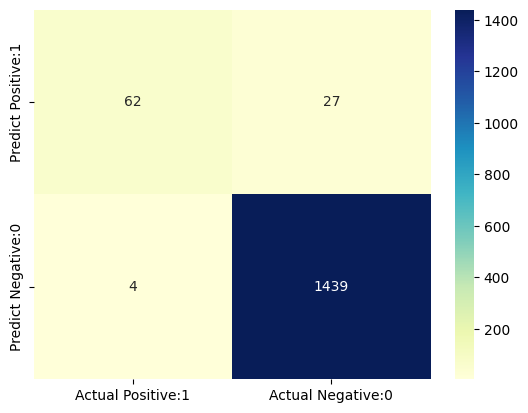

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80        89
         1.0       0.98      1.00      0.99      1443

    accuracy                           0.98      1532
   macro avg       0.96      0.85      0.89      1532
weighted avg       0.98      0.98      0.98      1532



# EDA

In [ ]:
data = '/content/gaitphase/training2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)
print(df.shape)
print(df.head())

(4373, 10)
   phase  hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
0      1   0.985963    0.239793    66.594623                   NaN   
1      1   0.998805    0.314891    67.149307              0.192632   
2      1   0.998805    0.341573    68.154023              0.000000   
3      1   0.676542    0.643746    69.169926             -4.833705   
4      1   1.210950    1.178153    70.475317              8.015713   

   hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
0              NaN                    NaN               NaN   
1         2.889329               1.126423         16.895494   
2        -2.889329               0.400202        -10.892765   
3       -72.501951               4.532369         61.979410   
4       192.731633               8.015713         52.247543   

   ankle-angular-velocity  ankle-angular-acc  
0                     NaN                NaN  
1                8.319841         124.791375  
2               15.069976         101.246969  
3

Text(0, 0.5, 'Knee-angle')

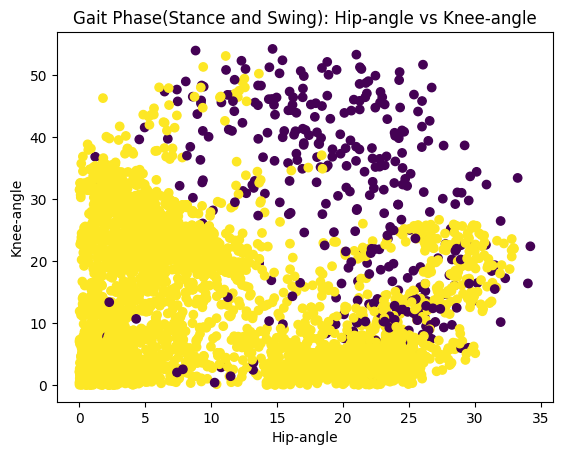

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(df['hip-angle'],df['knee-angle'],c=df['phase'])
plt.title('Gait Phase(Stance and Swing): Hip-angle vs Knee-angle')
plt.xlabel('Hip-angle')
plt.ylabel('Knee-angle')

Text(0, 0.5, 'Knee-angular-velocity')

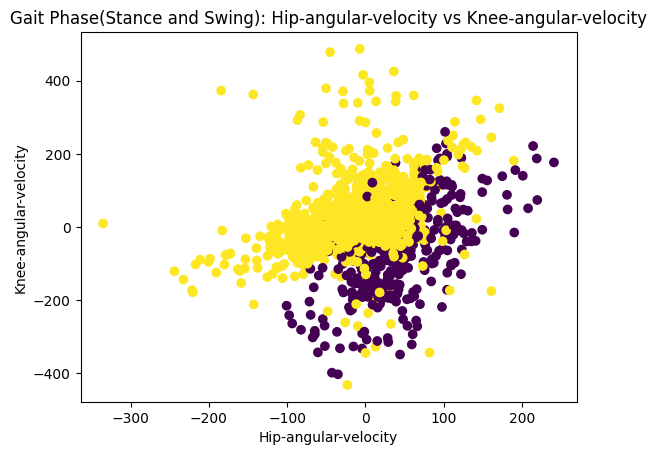

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(df['hip-angular-velocity'],df['knee-angular-velocity'],c=df['phase'])
plt.title('Gait Phase(Stance and Swing): Hip-angular-velocity vs Knee-angular-velocity')
plt.xlabel('Hip-angular-velocity')
plt.ylabel('Knee-angular-velocity')

Text(0, 0.5, 'Knee-angular-acc')

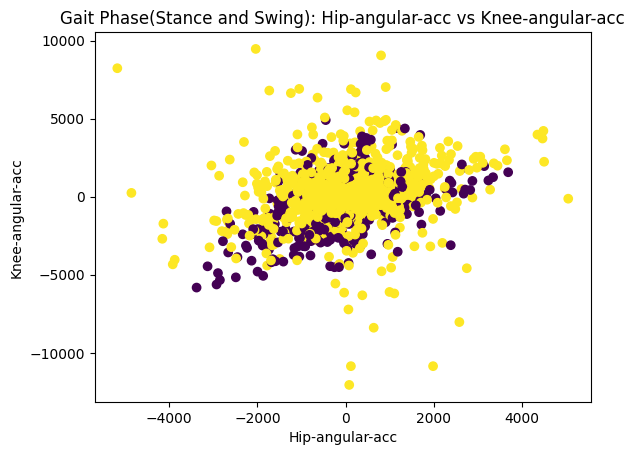

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(df['hip-angular-acc'],df['knee-angular-acc'],c=df['phase'])
plt.title('Gait Phase(Stance and Swing): Hip-angular-acc vs Knee-angular-acc')
plt.xlabel('Hip-angular-acc')
plt.ylabel('Knee-angular-acc')

Text(0, 0.5, 'Knee-angular-acc')

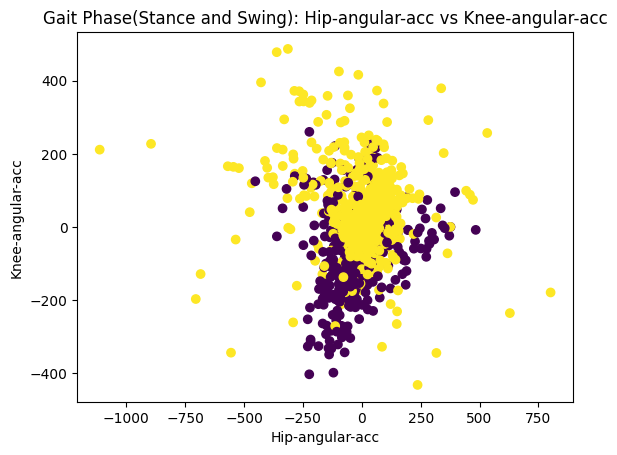

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(df['ankle-angular-velocity'],df['knee-angular-velocity'],c=df['phase'])
plt.title('Gait Phase(Stance and Swing): Hip-angular-acc vs Knee-angular-acc')
plt.xlabel('Hip-angular-acc')
plt.ylabel('Knee-angular-acc')

# Model Selection and Training and Evaluation: [All]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(df):

    df = df.dropna()

    X = df.drop(['phase'], axis=1)

    y = df['phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
    
    print(type(X_train))

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    print(type(X_train))
    
    return X_train, X_test, y_train, y_test

In [ ]:
data = '/content/gaitphase/training2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)
print(df.shape)
print(df.head())

X_train, X_test, y_train, y_test = preprocess(df)

(4373, 10)
   phase  hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
0      1   0.985963    0.239793    66.594623                   NaN   
1      1   0.998805    0.314891    67.149307              0.192632   
2      1   0.998805    0.341573    68.154023              0.000000   
3      1   0.676542    0.643746    69.169926             -4.833705   
4      1   1.210950    1.178153    70.475317              8.015713   

   hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
0              NaN                    NaN               NaN   
1         2.889329               1.126423         16.895494   
2        -2.889329               0.400202        -10.892765   
3       -72.501951               4.532369         61.979410   
4       192.731633               8.015713         52.247543   

   ankle-angular-velocity  ankle-angular-acc  
0                     NaN                NaN  
1                8.319841         124.791375  
2               15.069976         101.246969  
3

In [ ]:
y_test.value_counts()

1    789
0     80
Name: phase, dtype: int64

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
import xgboost as XGB
import lightgbm as lgb

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

var_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (kernel SVM)": SVC(kernel = 'rbf', random_state = 0),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models.items():
  model.fit(X_train, y_train)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (kernel SVM) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.017538
0:	learn: 0.6562964	total: 4.89ms	remaining: 4.88s
1:	learn: 0.6149397	total: 9.06ms	remaining: 4.52s
2:	learn: 0.5830275	total: 12.8ms	remaining: 4.24s
3:	learn: 0.5503259	total: 16.7ms	remaining: 4.15s
4:	learn: 0.5172876	total: 20.5ms	remaining: 4.07s
5:	learn: 0.4891952	total: 24.1ms	remaining: 3.99s
6:	learn: 0.4628044	total: 27.8ms	remaining: 3.94s
7:	learn: 0.4379435	total: 31.7ms	remaining: 3.94s
8:	learn: 0.4121413	total: 35.6ms	remaining: 3.92s
9:	learn: 0.3906263	total: 39.3ms	remaining: 3.89s
10:	learn: 0.3721909	total: 43.1ms	remaining: 3.88s
11:	learn: 0.3526769	total: 47ms	remaining: 3.87

In [ ]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_test, y_test)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test_pred, y_test))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_test_pred , y_test))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test_pred , y_test)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test_pred , y_test)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test_pred , y_test)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test_pred , y_test)))
  # cm = confusion_matrix(y_test_pred, y_test)
  cm = confusion_matrix(y_test, y_test_pred)
  print(cm)

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        69
           1       0.99      0.98      0.99       800

    accuracy                           0.98       869
   macro avg       0.90      0.96      0.93       869
weighted avg       0.98      0.98      0.98       869

Logistic Regression: 97.8136%
Accuracy :0.9781
AUC : 0.9616
Precision : 0.9949
Recall : 0.9812
F1 : 0.9880
[[ 65  15]
 [  4 785]]
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        81
           1       0.99      0.99      0.99       788

    accuracy                           0.98       869
   macro avg       0.95      0.95      0.95       869
weighted avg       0.98      0.98      0.98       869

K-Nearest Neighbors: 98.2739%
Accuracy :0.9827
AUC : 0.9462
Precision : 0.9899
Recall : 0.9911
F1 : 0.9905
[[ 73   7

In [ ]:
# Applying the same steps applied to Train Data on EVALUATION Dataset

from sklearn.model_selection import train_test_split

data = '/content/gaitphase/testing2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)

print(df.shape)
# print(df.head())

df = df.dropna()
X = df.drop(['phase'],axis=1)
y = df['phase']


X_eval = X
y_eval = y

print(y_eval.value_counts())
print(X_eval.shape)
print(X_eval.head())

from sklearn.preprocessing import StandardScaler

cols = X_eval.columns
scaler = StandardScaler()

X_eval = scaler.fit_transform(X_eval)

# After scaling it return 'numpy.ndarray' not 'pandas.core.frame.DataFrame'. Thus converting numpy array to pandas dataframe
X_eval = pd.DataFrame(X_eval,columns=[cols])

print(X_eval.head())


(1541, 10)
1.0    1443
0.0      89
Name: phase, dtype: int64
(1532, 9)
   hip-angle  knee-angle  ankle-angle  hip-angular-velocity  hip-angular-acc  \
1   5.613865    5.803525    70.005660            -14.043533      -210.642459   
2   4.677418    5.811839    70.178645            -14.046008        -0.037132   
3   3.236424    4.754232    70.189986            -21.613834      -113.511705   
4   2.232917    3.748325    71.260598            -15.051844        98.424928   
5   2.579147    3.736481    70.201556              5.193196       303.660410   

   knee-angular-velocity  knee-angular-acc  ankle-angular-velocity  \
1               8.327061        124.899671                0.194411   
2               0.124707       -123.029160                2.594642   
3             -15.863324       -239.808471                0.170110   
4             -15.087845         11.631595               16.058371   
5              -0.177658        223.641625              -15.884827   

   ankle-angular-acc  
1   

In [ ]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_eval, y_eval)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_eval_pred = model.predict(X_eval)
  print(metrics.classification_report(y_eval_pred, y_eval))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_eval_pred , y_eval))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_eval_pred , y_eval)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_eval_pred , y_eval)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_eval_pred , y_eval)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_eval_pred , y_eval)))
  cm = confusion_matrix(y_eval, y_eval_pred)
  print(cm)

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        75
           1       1.00      0.99      0.99      1457

    accuracy                           0.99      1532
   macro avg       0.90      0.97      0.93      1532
weighted avg       0.99      0.99      0.99      1532

Logistic Regression: 98.5640%
Accuracy :0.9856
AUC : 0.9672
Precision : 0.9972
Recall : 0.9876
F1 : 0.9924
[[  71   18]
 [   4 1439]]
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        87
           1       0.99      0.99      0.99      1445

    accuracy                           0.98      1532
   macro avg       0.91      0.92      0.92      1532
weighted avg       0.98      0.98      0.98      1532

K-Nearest Neighbors: 98.1723%
Accuracy :0.9817
AUC : 0.9201
Precision : 0.9910
Recall : 0.9896
F1 : 0.9903
[[  7

# ANN

In [4]:
data = '/content/gaitphase/training2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)
print(df.shape)
print(df.head())

(4373, 10)
   phase  hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
0      1   0.985963    0.239793    66.594623                   NaN   
1      1   0.998805    0.314891    67.149307              0.192632   
2      1   0.998805    0.341573    68.154023              0.000000   
3      1   0.676542    0.643746    69.169926             -4.833705   
4      1   1.210950    1.178153    70.475317              8.015713   

   hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
0              NaN                    NaN               NaN   
1         2.889329               1.126423         16.895494   
2        -2.889329               0.400202        -10.892765   
3       -72.501951               4.532369         61.979410   
4       192.731633               8.015713         52.247543   

   ankle-angular-velocity  ankle-angular-acc  
0                     NaN                NaN  
1                8.319841         124.791375  
2               15.069976         101.246969  
3

In [5]:
# Train-Test Split

from sklearn.model_selection import train_test_split

df = df.dropna()

X = df.drop(['phase'],axis=1)
y = df['phase']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X_train.shape, X_test.shape)
print()

print(X_train.head())
print(X_test.head())

(3476, 9) (869, 9)

      hip-angle  knee-angle  ankle-angle  hip-angular-velocity  \
3410  16.210336    2.432341    57.134577             13.629603   
3715  15.439016    2.286594    58.153708            -11.995624   
3294  19.788213    1.280980    71.433699            -25.274899   
4224   3.279495   26.648560    72.751846             19.777110   
1223  25.384121   15.112340    71.057222             10.751066   

      hip-angular-acc  knee-angular-velocity  knee-angular-acc  \
3410       489.674868              20.327377        256.135986   
3715       289.742278               0.030538         -4.207485   
3294       147.719820             -22.872690        171.701252   
4224       128.280586             -15.276967        168.465744   
1223       -24.655118              36.400441        204.873523   

      ankle-angular-velocity  ankle-angular-acc  
3410              -12.317956        -156.701237  
3715                7.949372         598.897330  
3294              -78.854220        

In [17]:
# Pre-Processing
# Scaling

from sklearn.preprocessing import StandardScaler

cols = X_train.columns
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# After scaling it return 'numpy.ndarray' not 'pandas.core.frame.DataFrame'. Thus converting numpy array to pandas dataframe
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])


print(X_train.head())
print(X_test.head())

  hip-angle knee-angle ankle-angle hip-angular-velocity hip-angular-acc  \
0  0.543305  -0.871017   -1.630231             0.388744        0.724984   
1  0.458782  -0.883526   -1.524651            -0.337608        0.429572   
2  0.935375  -0.969832   -0.148874            -0.714012        0.219725   
3 -0.873680   1.207327   -0.012317             0.562996        0.191002   
4  1.548585   0.217237   -0.187877             0.307151       -0.034969   

  knee-angular-velocity knee-angular-acc ankle-angular-velocity  \
0              0.317745         0.233213              -0.179726   
1             -0.016532        -0.003896               0.108548   
2             -0.393736         0.156313              -1.126110   
3             -0.268639         0.153367              -0.021597   
4              0.582460         0.186525               0.112938   

  ankle-angular-acc  
0         -0.107530  
1          0.405735  
2         -0.494272  
3          0.001992  
4         -0.076601  
  hip-angle kn

In [18]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=5)

Epoch 1/20
696/696 [==============================] - 4s 3ms/step - loss: 0.1418 - accuracy: 0.9655
Epoch 2/20
696/696 [==============================] - 2s 3ms/step - loss: 0.0514 - accuracy: 0.9836
Epoch 3/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9868
Epoch 4/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9894
Epoch 5/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0341 - accuracy: 0.9902
Epoch 6/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0313 - accuracy: 0.9908
Epoch 7/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0283 - accuracy: 0.9902
Epoch 8/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9908
Epoch 9/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 10/20
696/696 [==============================] - 1s 2ms/step - loss: 0.0244 - accuracy: 0.9919

In [21]:
# Accuracy
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9804


[0.06030131131410599, 0.9804372787475586]

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create true labels and predicted labels
y_pred = model.predict(X_test).round()
# y_pred = [np.argmax(i) for i in model.predict(X_test)]

print(y_test.ndim)
print(y_pred.ndim)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

28/28 [==============================] - 0s 2ms/step
1
2
Accuracy: 0.9804372842347526
Precision: 0.9910941475826972
Recall: 0.9873257287705957
F1 score: 0.9892063492063493
Confusion matrix:
[[ 73   7]
 [ 10 779]]


In [28]:
# Validation Set

# Applying the same steps applied to Train Data on EVALUATION Dataset

from sklearn.model_selection import train_test_split

data = '/content/gaitphase/testing2-gait-joint-angles-dataset.csv'

df = pd.read_csv(data)
df.rename(columns = {'Phase(1-Stance,0-Swing)':'phase'}, inplace = True)

print(df.shape)
# print(df.head())

df = df.dropna()
X = df.drop(['phase'],axis=1)
y = df['phase']


X_eval = X
y_eval = y

print(y_eval.value_counts())
print(X_eval.shape)
print(X_eval.head())

from sklearn.preprocessing import StandardScaler

cols = X_eval.columns
scaler = StandardScaler()

X_eval = scaler.fit_transform(X_eval)

# After scaling it return 'numpy.ndarray' not 'pandas.core.frame.DataFrame'. Thus converting numpy array to pandas dataframe
X_eval = pd.DataFrame(X_eval,columns=[cols])

print(X_eval.head())


(1541, 10)
1.0    1443
0.0      89
Name: phase, dtype: int64
(1532, 9)
   hip-angle  knee-angle  ankle-angle  hip-angular-velocity  hip-angular-acc  \
1   5.613865    5.803525    70.005660            -14.043533      -210.642459   
2   4.677418    5.811839    70.178645            -14.046008        -0.037132   
3   3.236424    4.754232    70.189986            -21.613834      -113.511705   
4   2.232917    3.748325    71.260598            -15.051844        98.424928   
5   2.579147    3.736481    70.201556              5.193196       303.660410   

   knee-angular-velocity  knee-angular-acc  ankle-angular-velocity  \
1               8.327061        124.899671                0.194411   
2               0.124707       -123.029160                2.594642   
3             -15.863324       -239.808471                0.170110   
4             -15.087845         11.631595               16.058371   
5              -0.177658        223.641625              -15.884827   

   ankle-angular-acc  
1   

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create true labels and predicted labels
y_pred = model.predict(X_eval).round()
# y_pred = [np.argmax(i) for i in model.predict(X_test)]

print(y_eval.ndim)
print(y_pred.ndim)

# Calculate accuracy
accuracy = accuracy_score(y_eval, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_eval, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_eval, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_eval, y_pred)
print("F1 score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_eval, y_pred)
print("Confusion matrix:")
print(cm)

48/48 [==============================] - 0s 2ms/step
1
2
Accuracy: 0.9862924281984334
Precision: 0.9903448275862069
Recall: 0.9951489951489951
F1 score: 0.9927410992049776
Confusion matrix:
[[  75   14]
 [   7 1436]]
